# Practical session 2

#### Importing libraries

In [54]:
import numpy as np
import numpy.fft
import pylab as pl
import scipy as sp
import scipy.signal
import scipy.io.wavfile

## 1 Random signals properties

### 1.1 Gaussian noise

#### Question 1

In [55]:
N_s = 1024
sigma = np.sqrt(1.2)
w = sigma * np.random.randn(N_s)

#### Question 2

variance = 1.255230098182775


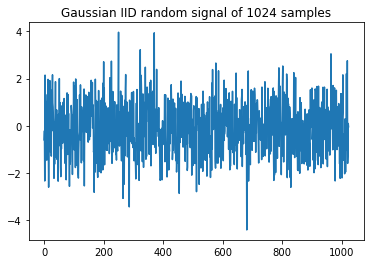

In [56]:
pl.figure()
pl.plot(w)
pl.title("Gaussian IID random signal of 1024 samples")

print("variance =", np.std(w) ** 2)

The computed variance is close to its theoretical value which is 1.2.

#### Question 3

Text(0.5, 1.0, 'Histogram of another realisation of w')

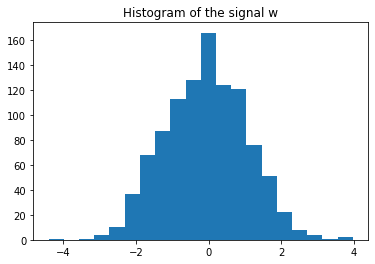

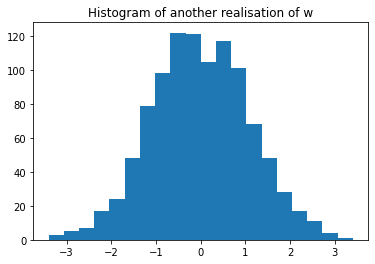

In [57]:
pl.figure()
pl.hist(w, 20)
pl.title("Histogram of the signal w")

w2 = sigma * np.random.randn(N_s)
pl.figure()
pl.hist(w2, 20)
pl.title("Histogram of another realisation of w")

It does look like a gaussian but this is not very accurate. Indeed, it is only approximately symmetric and the difference between two realisations of the same signal is visible.

Text(0.5, 1.0, 'Histogram for a smaller sample size')

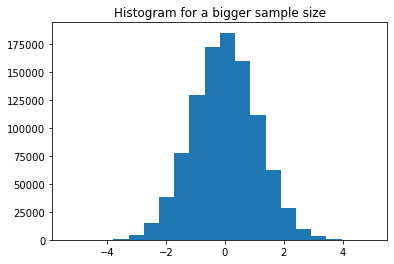

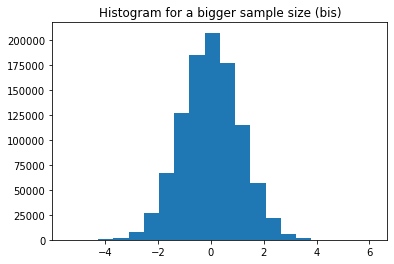

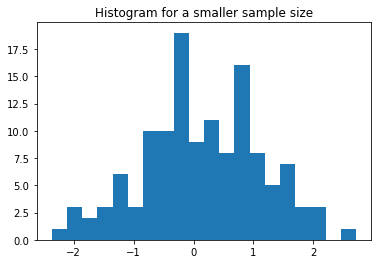

In [58]:
N_big = 1000000
w_big = sigma * np.random.randn(N_big)
pl.figure()
pl.hist(w_big, 20)
pl.title("Histogram for a bigger sample size")

w_big = sigma * np.random.randn(N_big)
pl.figure()
pl.hist(w_big, 20)
pl.title("Histogram for a bigger sample size (bis)")

N_small = 128
w_small = sigma * np.random.randn(N_small)
pl.figure()
pl.hist(w_small, 20)
pl.title("Histogram for a smaller sample size")

When the size is bigger than 1024, it looks more like a gaussian and there are less variations between realisations.
<br>However, when the sample size is too small, this doesn't really look like a gaussian apart from the fact that it is vaguely centered around 0.

#### Question 4

In [59]:
corr_full = sp.signal.correlate(w, w, mode = 'full') / N_s

We need to divide the discrete finite convolution by the number of samples if we want it to be the empirical autocorrelation (assuming ergodicity).

#### Question 5

1.2621135353029311


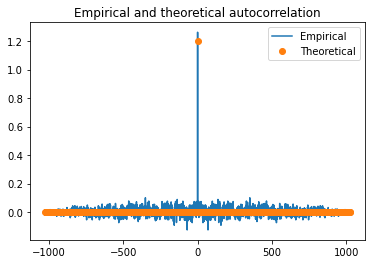

In [60]:
n = np.arange(-(N_s - 1), N_s)
dirac = np.zeros(2047)
dirac[N_s - 1] = sigma ** 2

pl.figure()
pl.plot(n, corr_full, label = "Empirical")
pl.plot(n, dirac, 'o', label = "Theoretical")
pl.title("Empirical and theoretical autocorrelation")
pl.legend()

print(corr_full[N_s - 1])

The theoretical autocorrelation of an IID gaussian noise is $\sigma^2\delta[n]$.
<br>For $n = 0$, we recover the variance of the noise with a satisfyingly small error.
<br>At the extremities of the correlation, the values are smaller than in the center. It is because the mode 'full' uses zero padding to compute the discrete convolution. Hence, there are a lot of terms that equal zero in the sums corresponding to the extreme values.

#### Question 6

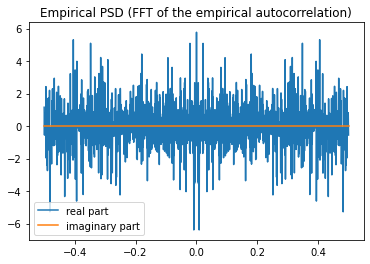

In [61]:
corr_same = sp.signal.correlate(w, w, mode = 'same') / N_s
psd_emp = np.fft.fft(corr_same)
psd_emp = np.fft.fftshift(psd_emp)
freqs = np.fft.fftfreq(N_s)
freqs = np.fft.fftshift(freqs)

pl.figure()
pl.plot(freqs, psd_emp.real, label = "real part")
pl.plot(freqs, psd_emp.imag, label = "imaginary part")
pl.title("Empirical PSD (FFT of the empirical autocorrelation)")
pl.legend()

We can see that the empirical PSD is real (imaginary part is zero) but it is not positive at all !
<br>It is because we are working with a finite signal. Thus, the empirical correlation is only a bad approximation of the theoretical one, which is why the FFT does not behave as expected.

#### Question 7

Text(0.5, 1.0, 'Estimation of the PSD as squared magnitude of the FFT of w')

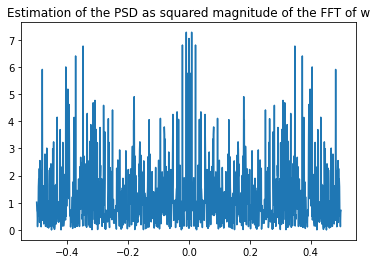

In [62]:
fft = np.fft.fft(w)
psd_bis = (np.real(fft) ** 2 + np.imag(fft) ** 2) / N_s
psd_bis = np.fft.fftshift(psd_bis)
freqs = np.fft.fftfreq(N_s)
freqs = np.fft.fftshift(freqs)

pl.figure()
pl.plot(freqs, psd_bis)
pl.title("Estimation of the PSD as squared magnitude of the FFT of w")

This time, it is positive since it is a squared magnitude.

#### Question 8

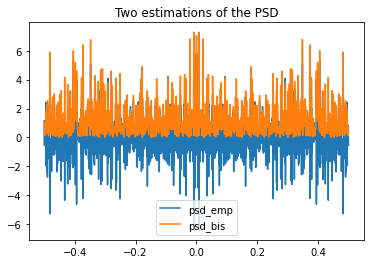

In [63]:
pl.figure()
pl.plot(freqs, psd_emp.real, label = "psd_emp")
pl.plot(freqs, psd_bis, label = "psd_bis")
pl.title("Two estimations of the PSD")
pl.legend()

They are different because for the first one we start by computing an approched autocorrelation before taking the FFT whereas for the second one we directly take the squared magnitude of the realisation's FFT.
<br> The main difference is that the second one is positive and has larger values. Apart from that, if we only look at the positive values of the first estimation, the general shape is similar to the second one. Moreover, it looks like the negative values of the first estimation are almost the opposites of the values of the second estimation.

#### Question 9

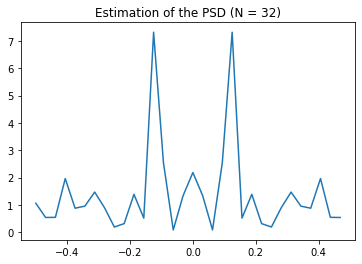

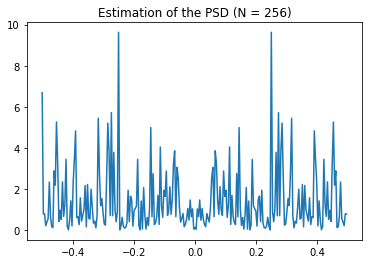

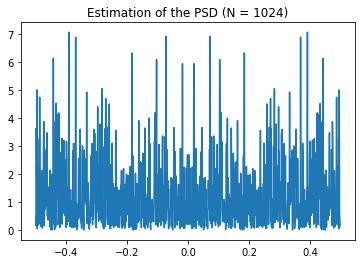

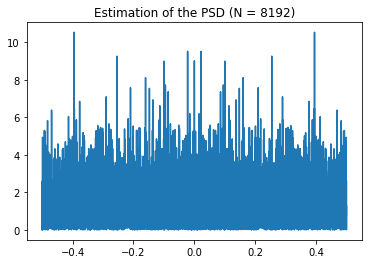

In [64]:
Ns = [32, 256, 1024, 8192]

for N in Ns:
    w_N = sigma * np.random.randn(N)
    fft_N = np.fft.fft(w_N)
    psd_N = (np.real(fft_N) ** 2 + np.imag(fft_N) ** 2) / N
    psd_N = np.fft.fftshift(psd_N)
    freqs = np.fft.fftfreq(N)
    freqs = np.fft.fftshift(freqs)
    pl.figure()
    pl.plot(freqs, psd_N)
    pl.title("Estimation of the PSD (N = {})".format(N))

The effect of the number of samples is not very clear to me. All I can see is that the bottom of the plot is more and more noisy when the number of samples grows. Moreover, the spikes are bigger when N is bigger.

#### Question 10

In [65]:
f_s = 8000
x = sigma * np.random.randn(f_s * 3)
sp.io.wavfile.write("Data/gaussian_noise.wav", f_s, x)

It is a little bit more brutal than the beginning of an episode of an HBO series ...

### 1.2 Noisy sine wave

#### Question  1

Text(0.5, 1.0, 'A realisation of the random signal X[n]')

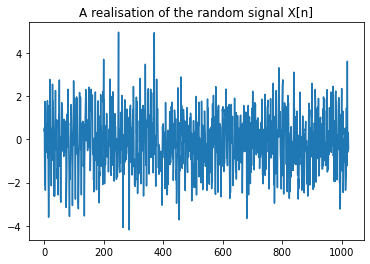

In [66]:
f_0 = 0.1
phi = np.random.uniform(0, 2 * np.pi)

n = np.arange(N_s)
x = np.cos(2 * np.pi * f_0 * n + phi) + w

pl.figure()
pl.plot(x)
pl.title("A realisation of the random signal X[n]")

I cannot see the sine wave since the noise's amplitude is too high.

#### Question 2

1.2577782078625723


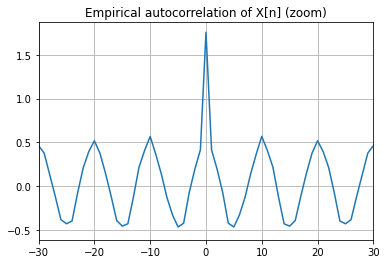

In [67]:
n = np.arange(-(N_s - 1), N_s)
corr_emp = sp.signal.correlate(x, x, mode = 'full') / N_s

pl.figure()
pl.plot(n, corr_emp)
pl.xlim(-30, 30)
pl.grid()
pl.title("Empirical autocorrelation of X[n] (zoom)")
print(corr_emp[N_s - 1] - 0.5)

We can see that the empirical autocorrelation is a sum of a dirac and what seems to be a cosine of period 10 (i.e. of frequency $0.1 = f_0$) with phase 0 and amplitude 0.5. This corresponds to the cosine in the signal.
<br> Also, the dirac is multiplied by around $1.7 - 0.5 = 1.2 = \sigma^2$, which corresponds to the variance of the gaussian noise. It corresponds to the gaussian noise in the signal.

#### Question 3 

The theoretical autocorrelation is $R_X(k) = \mathbb E[X[n+k]X[n]] = \sigma^2\delta[k] + \frac 1 2 cos(2\pi f_0k)$.

(-30.0, 30.0)

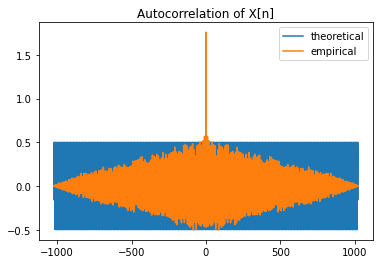

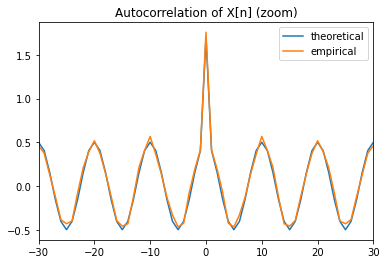

In [68]:
n = np.arange(-(N_s - 1), N_s)
corr_th = 0.5 * np.cos(2 * np.pi  * f_0 * n)
corr_th[N_s - 1] += sigma ** 2

pl.figure()
pl.plot(n, corr_th, label = "theoretical")
pl.plot(n, corr_emp, label = "empirical")
pl.title("Autocorrelation of X[n]")
pl.legend()

pl.figure()
pl.plot(n, corr_th, label = "theoretical")
pl.plot(n, corr_emp, label = "empirical")
pl.title("Autocorrelation of X[n] (zoom)")
pl.legend()
pl.xlim(-30, 30)

Apart from the fact that it approches 0 in the extremities because of the zero padding, if we look at the center, the empirical correlation is very close to the theoretical one !

#### Question 4

In [69]:
fft = np.fft.fft(x)
psd_emp = (np.real(fft) ** 2 + np.imag(fft) ** 2) / N_s
psd_emp = np.fft.fftshift(psd_emp)
freqs = np.fft.fftfreq(N_s)
freqs = np.fft.fftshift(freqs)

#### Question 5

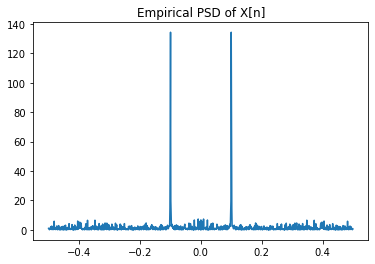

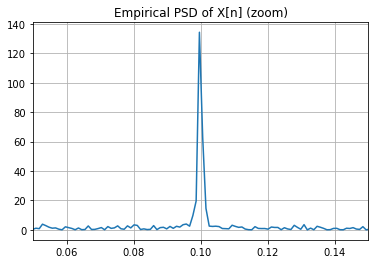

In [70]:
pl.figure()
pl.plot(freqs, psd_emp)
pl.title("Empirical PSD of X[n]")

pl.figure()
pl.plot(freqs, psd_emp)
pl.title("Empirical PSD of X[n] (zoom)")
pl.xlim(0.05, 0.15
       )
pl.grid()

We can clearly see the component corresponding to the cosine in the signal. 
<br>In theory, the PSD is a sum of a constant and two diracs located at $|f_0| = 0.1$, and there are a very clear spikes at these frequencies.

#### Question 6

In [71]:
f_s = 8000

n = np.arange(3 * f_s)
x = np.cos(2 * np.pi * f_0 * n + phi) + sigma * np.random.randn(3 * f_s)

sp.io.wavfile.write("Data/noisy_sine.wav", f_s, x)

Now, we can hear a note with the noise. It corresponds to the cosine which has a frequency of $f_0 * f_s = 800$ Hz.

## 2 AR modeling

### 2.1 Simulated signals

#### Question 1

In [72]:
N_s = 4096
w = np.random.randn(N_s)

a_1 = [1, -0.9]
x_1 = sp.signal.lfilter([1], a_1, w)

a_2 = [1, -0.9, 0.8]
x_2 = sp.signal.lfilter([1], a_2, w)

I took the stationary component of each signal, which is a convolution between the gaussian noise and the impulse response of the inverse of the filter associated with the AR model.

#### Question 2

Text(0.5, 1.0, 'Signals in time')

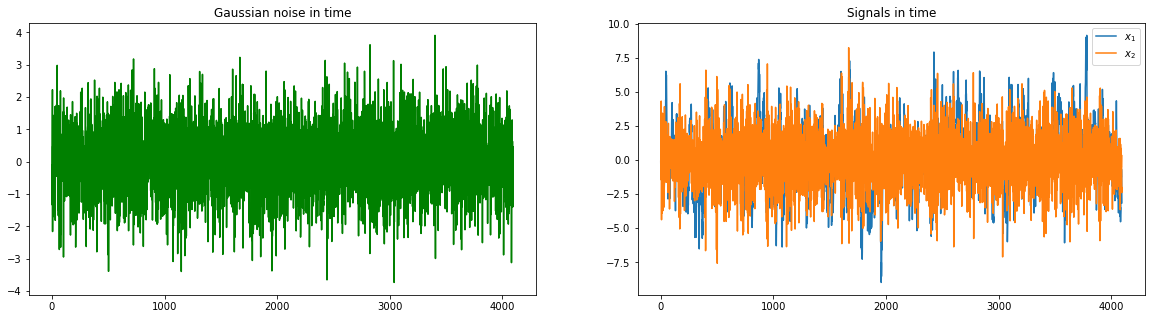

In [73]:
f, axes = pl.subplots(1, 2, figsize = (20, 5))
axes[0].plot(w, color = "green")
axes[0].set_title("Gaussian noise in time")
axes[1].plot(x_1, label = "$x_1$")
axes[1].plot(x_2, label = "$x_2$")
pl.legend()
axes[1].set_title("Signals in time")

When looking at the signals in time, they do not seem to be that different from the gaussian noise apart from the fact that their amplitudes are bigger. Let's see if we can find any difference in the Fourier domain !

Text(0.5, 1.0, 'FFT of $X_1$ and $X_2$')

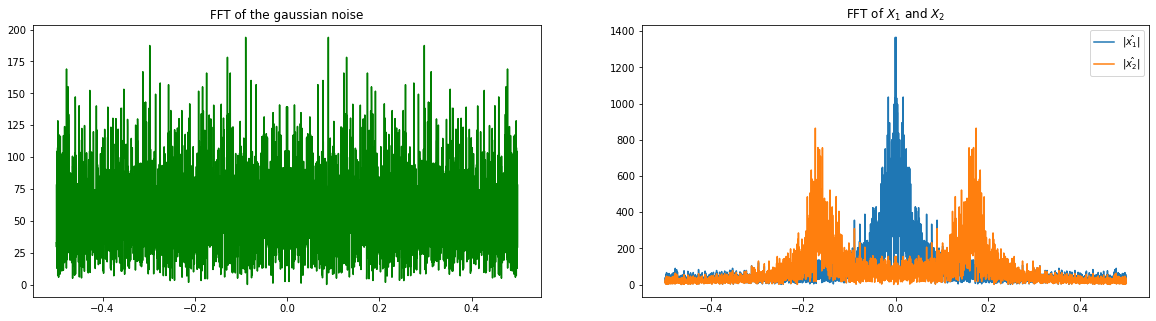

In [74]:
freqs = np.fft.fftfreq(N_s)
freqs = np.fft.fftshift(freqs)

fft_w = np.fft.fft(w)
fft_w = np.fft.fftshift(fft_w)
fft_x1 = np.fft.fft(x_1)
fft_x1 = np.fft.fftshift(fft_x1)
fft_x2 = np.fft.fft(x_2)
fft_x2 = np.fft.fftshift(fft_x2)

f, axes = pl.subplots(1, 2, figsize = (20, 5))
axes[0].plot(freqs, abs(fft_w), color = "green")
axes[0].set_title("FFT of the gaussian noise")
axes[1].plot(freqs, abs(fft_x1), label = "$|\hat {x_1}|$")
axes[1].plot(freqs, abs(fft_x2), label = "$|\hat {x_2}|$")
pl.legend()
axes[1].set_title("FFT of $X_1$ and $X_2$")

We can see that the first AR model corresponds to a low-pass filter whereas the second AR model corresponds to a band-pass filter. Thus, even is the two signals appear to be very noisy in time, their spectrums are less messy than we could imagine.

#### Question 3

In [75]:
f_s = 8000
ws = np.random.randn(f_s)

a_1 = [1, -0.9]
x_1s = sp.signal.lfilter([1], a_1, ws)

a_2 = [1, -0.9, 0.8]
x_2s = sp.signal.lfilter([1], a_2, ws)

sp.io.wavfile.write("Data/w.wav", f_s, ws)
sp.io.wavfile.write("Data/X_1.wav", f_s, x_1s)
sp.io.wavfile.write("Data/X_2.wav", f_s, x_2s)

When listening to the three signals, we can hear that there are lower frequencies in $x_1$ and higher frequencies in $x_2$ in comparison to the gaussian noise.

#### Questions 4 & 5

Let's simply follow the steps :

In [76]:
def ar_yule(x, N):
    r = sp.signal.correlate(x, x, mode = 'full')
    c = r[len(x) - 1 : len(x) - 1 + N]
    r_x = r[len(x) : len(x) + N]
    coeffs = sp.linalg.solve_toeplitz(c, - r_x)
    ae = np.concatenate([[1], coeffs])
    return ae

#### Question 6

In [77]:
print("estimation of a_1 :", ar_yule(x_1, 1))
print("estimation of a_2 :", ar_yule(x_2, 2))

estimation of a_1 : [ 1.        -0.9046503]
estimation of a_2 : [ 1.         -0.90850764  0.81214749]


The estimated values are quite close to the true model : the errors are around 0.01.
<br>It is because we cleverly solved the linear system with the Levinson recursion, which limits the numerical approximations made.

#### Question 7

In [78]:
Ns = [32, 8192]

for N in Ns:
    wN = np.random.randn(N)
    a_1 = [1, -0.9]
    x_1N = sp.signal.lfilter([1], a_1, wN)
    a_2 = [1, -0.9, 0.8]
    x_2N = sp.signal.lfilter([1], a_2, wN) 
    print("Ns = {}".format(N))
    print("estimation of a_1 :", ar_yule(x_1N, 1))
    print("estimation of a_2 :", ar_yule(x_2N, 2))

Ns = 32
estimation of a_1 : [ 1.        -0.8862197]
estimation of a_2 : [ 1.         -0.84288588  0.75598829]
Ns = 8192
estimation of a_1 : [ 1.         -0.90327838]
estimation of a_2 : [ 1.         -0.90784915  0.80896555]


When the number of samples grows, the estimation of the coefficients is more and more precise.

In [79]:
print("estimation of a_1 (N = 3 > 1) :\n", ar_yule(x_1, 5))
print("estimation of a_2 (N = 6 > 2) :\n", ar_yule(x_2, 5))

estimation of a_1 (N = 3 > 1) :
 [ 1.         -0.91054584  0.01108452  0.00307821  0.00233998 -0.01250125]
estimation of a_2 (N = 6 > 2) :
 [ 1.         -0.91092091  0.80994043 -0.00592056  0.00335346 -0.01037929]


When the order of the AR is larger than the true order of the model, we can see that the first coefficients (who are present in the true model) are correctly estimated and that the following are close to zero (which is their true value).

Thus, it is not a very big deal if we don't know the order in advance since the coefficients past the order will be estimated as close to zero, which almost gives us the order.

#### Question 8

In [80]:
def get_psd_ar(a, f):
    ft_a = sum([a[k] * np.exp(-2 * np.pi * 1j * f * k) for k in range(len(a))])
    return 1 / (ft_a.real ** 2 + ft_a.imag ** 2)

I used the formula which was derived during one of the lectures.

#### Question 9

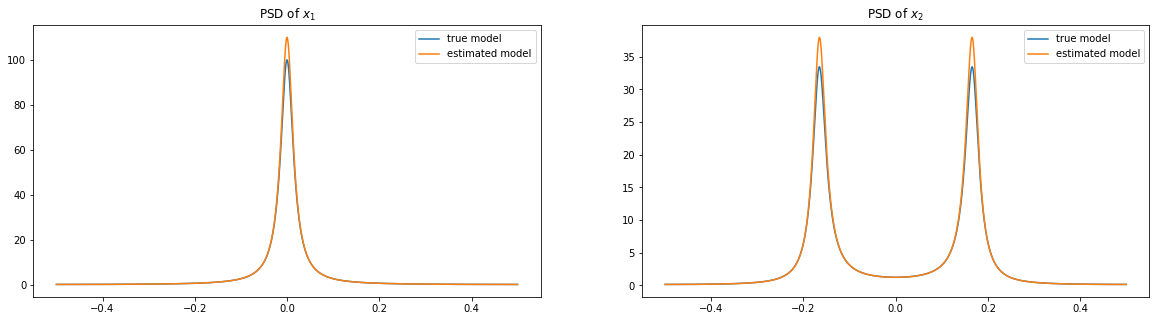

In [81]:
freqs = np.fft.fftfreq(N_s)
freqs = np.fft.fftshift(freqs)
ae_1 = ar_yule(x_1, 1)
ae_2 = ar_yule(x_2, 2)

f, axes = pl.subplots(1, 2, figsize = (20, 5))
axes[0].plot(freqs, get_psd_ar(a_1, freqs), label = "true model")
axes[0].plot(freqs, get_psd_ar(ae_1, freqs), label = "estimated model")
axes[0].set_title("PSD of $x_1$")
axes[0].legend()
axes[1].plot(freqs, get_psd_ar(a_2, freqs), label = "true model")
axes[1].plot(freqs, get_psd_ar(ae_2, freqs), label = "estimated model")
axes[1].set_title("PSD of $x_2$")
axes[1].legend()

We can see that the two PSD are quite close. For $x_1$ and $x_2$, the only differences (between the estimated model and the true one) appear where there are spikes in the PSD.

The PSD confirms what I thought when plotting the FFT (which was quite noisy) : the first AR model behaves as a low-pass filter whereas the second one is a band-pass filter. With the PSD (the theoretical one), there is no doubt because it is not noisy at all ! 

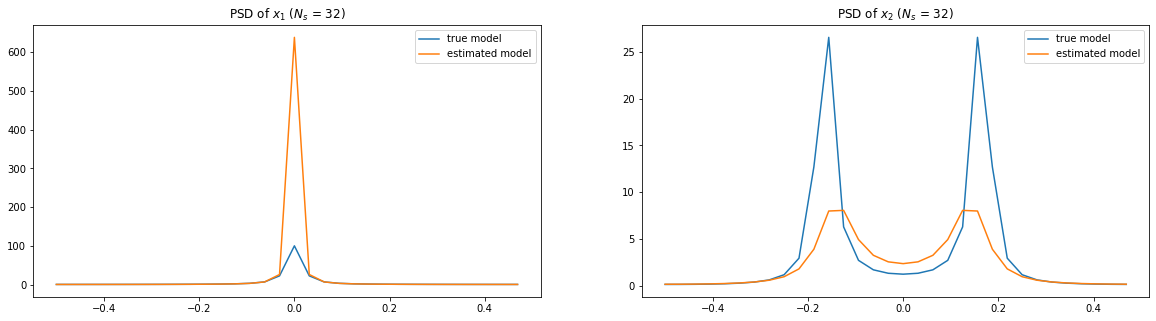

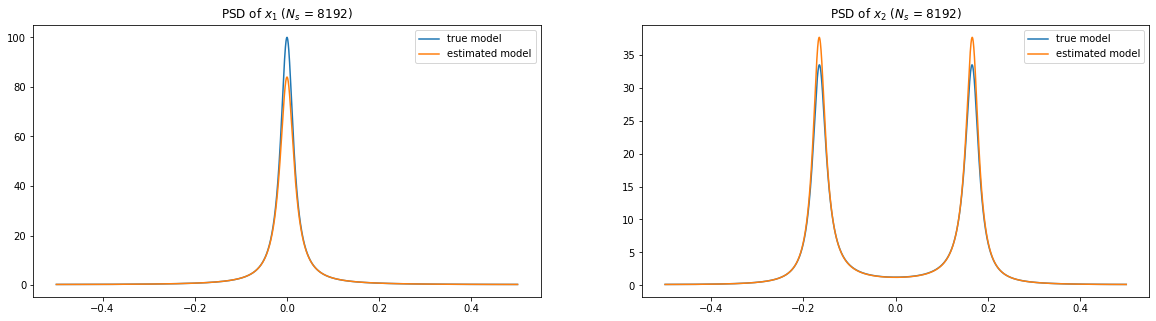

In [82]:
Ns = [32, 8192]

for N in Ns:
    freqs = np.fft.fftfreq(N)
    freqs = np.fft.fftshift(freqs)
    
    wN = np.random.randn(N)
    a_1 = [1, -0.9]
    x_1N = sp.signal.lfilter([1], a_1, wN)
    a_2 = [1, -0.9, 0.8]
    x_2N = sp.signal.lfilter([1], a_2, wN)
    
    ae_1N = ar_yule(x_1N, 1)
    ae_2N = ar_yule(x_2N, 2)
    f, axes = pl.subplots(1, 2, figsize = (20, 5))
    axes[0].plot(freqs, get_psd_ar(a_1, freqs), label = "true model")
    axes[0].plot(freqs, get_psd_ar(ae_1N, freqs), label = "estimated model")
    axes[0].set_title("PSD of $x_1$ ($N_s$ = {})".format(N))
    axes[0].legend()
    axes[1].plot(freqs, get_psd_ar(a_2, freqs), label = "true model")
    axes[1].plot(freqs, get_psd_ar(ae_2N, freqs), label = "estimated model")
    axes[1].set_title("PSD of $x_2$ ($N_s$ = {})".format(N))
    axes[1].legend()

For different values of $N_s$, the PSD of the estimated model is more and more closer to the PSD of the the true model when $N_s$ grows. It is pretty logical because we saw earlier that when $N_s$ grows, the estimation of the coefficients is more precise.

#### Question 10

When listening to the signals saved in question 3, we clearly hear more high frequencies in $x_2$, which can be predicted by looking at the PSD of the signals.

### 2.2 AR modeling of real life signals

#### Question 1

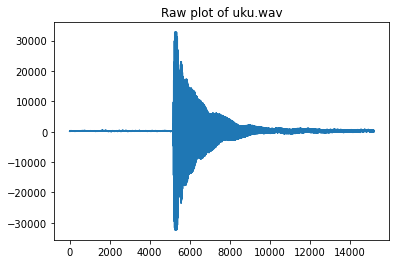

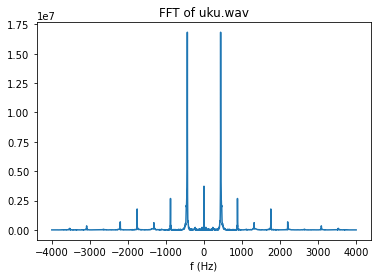

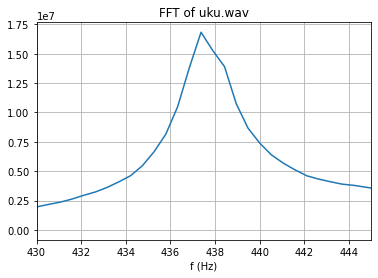

In [83]:
f_s, x_uku = sp.io.wavfile.read("Data/uku.wav")

freqs = np.fft.fftfreq(len(x_uku), 1 / f_s)
freqs = np.fft.fftshift(freqs)
x_fft = np.fft.fft(x_uku)
x_fft = np.fft.fftshift(x_fft)

pl.figure()
pl.plot(x_uku)
pl.title("Raw plot of uku.wav")

pl.figure()
pl.plot(freqs, abs(x_fft))
pl.title("FFT of uku.wav")
pl.xlabel("f (Hz)")

pl.figure()
pl.plot(freqs, abs(x_fft))
pl.title("FFT of uku.wav")
pl.xlabel("f (Hz)")
pl.xlim(430, 445)
pl.grid()

The fundamental frequency of the note played is the frequency where the biggest spike occurs in the spectrum. Thus, we have approximately $f_0 = 437$ Hz, which gives a normalized frequency of $f_0 / (f_s / 2) = 437 / (8000 / 2) = 0.1$.

In [84]:
f_0 = 437

#### Question 2

Text(0.5, 0, 'f (Hz)')

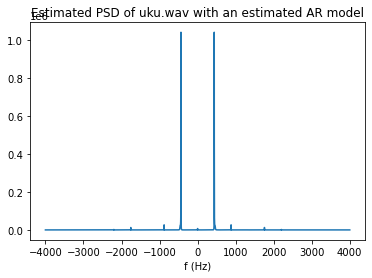

In [85]:
a_uku = ar_yule(x_uku / 35000, 100) # Normalization to bring stability
freqs = np.fft.fftfreq(len(x_uku))
freqs = np.fft.fftshift(freqs)

pl.figure()
pl.plot(freqs * f_s, get_psd_ar(a_uku, freqs))
pl.title("Estimated PSD of uku.wav with an estimated AR model")
pl.xlabel("f (Hz)")

It is similar to the spectrum apart from the fact that the minor spikes are very small compared to the fundamental.

####  Question 3

Text(0.5, 1.0, 'Raw plot of the uku.wav AR model applied to a gaussian noise')

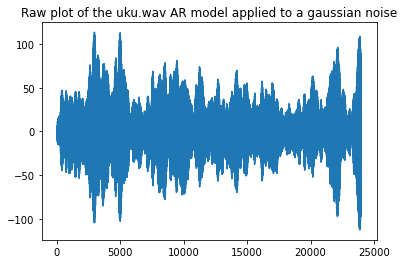

In [86]:
w_g = np.random.randn(3 * f_s)
x_ar_gaussian = sp.signal.lfilter([1], a_uku, w_g)

sp.io.wavfile.write("Data/uku_ar_gaussian.wav", f_s, x_ar_gaussian / 150)

pl.figure()
pl.plot(x_ar_gaussian)
pl.title("Raw plot of the uku.wav AR model applied to a gaussian noise")

When listening to the sound, we recover the fundamental frequency of uku.wav but it is definitely not as smooth. Thus, the ar model works because it recovers the fundamental pretty well but it could be much better in term of harmonics.

#### Question 4

Text(0.5, 1.0, 'Raw plot of the uku.wav AR model applied to the dirac comb')

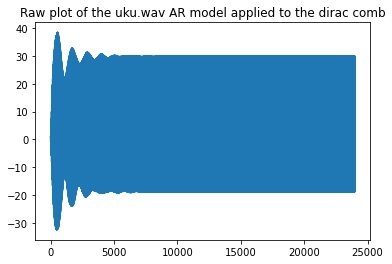

In [87]:
def comb(k):
    if k % int(f_s / f_0) == 0:
        return 1
    return 0

w_comb = [comb(k) for k in range(3 * f_s)]
x_ar_comb = sp.signal.lfilter([1], a_uku, w_comb)

sp.io.wavfile.write("Data/uku_ar_comb.wav", f_s, x_ar_comb / 40)

pl.figure()
pl.plot(x_ar_comb)
pl.title("Raw plot of the uku.wav AR model applied to the dirac comb")

This time, the sound is much more smoother like the original and we can still recover the note that is played with the ukulele. This excitation definitely fits better to the signal !

#### Question 5

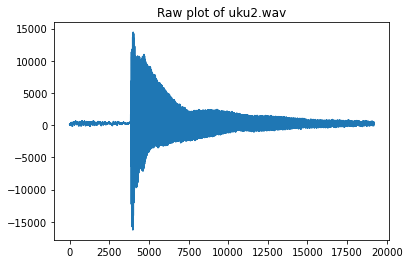

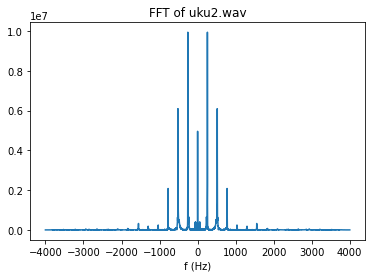

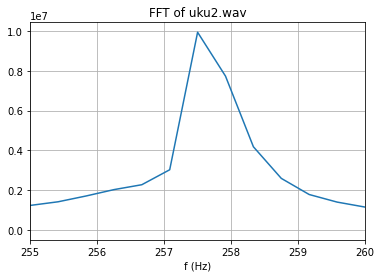

In [88]:
f_s, x_uku = sp.io.wavfile.read("Data/uku2.wav")

freqs = np.fft.fftfreq(len(x_uku), 1 / f_s)
freqs = np.fft.fftshift(freqs)
x_fft = np.fft.fft(x_uku)
x_fft = np.fft.fftshift(x_fft)

pl.figure()
pl.plot(x_uku)
pl.title("Raw plot of uku2.wav")

pl.figure()
pl.plot(freqs, abs(x_fft))
pl.title("FFT of uku2.wav")
pl.xlabel("f (Hz)")

pl.figure()
pl.plot(freqs, abs(x_fft))
pl.title("FFT of uku2.wav")
pl.xlabel("f (Hz)")
pl.xlim(255, 260)
pl.grid()

The fundamental frequency of the note played is the frequency where the biggest spike occurs in the spectrum. Thus, we have approximately $f_0 = 257$ Hz, which gives a normalized frequency of $f_0 / (f_s / 2) = 257 / (8000 / 2) = 0.06$.

In [89]:
f_0 = 257

Text(0.5, 0, 'f (Hz)')

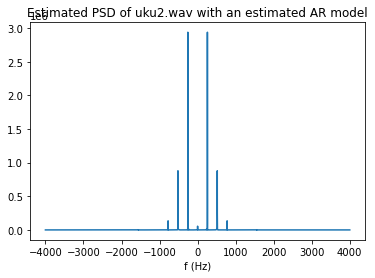

In [90]:
a_uku = ar_yule(x_uku / 20000, 100) # Normalization to bring stability
freqs = np.fft.fftfreq(len(x_uku))
freqs = np.fft.fftshift(freqs)

pl.figure()
pl.plot(freqs * f_s, get_psd_ar(a_uku, freqs))
pl.title("Estimated PSD of uku2.wav with an estimated AR model")
pl.xlabel("f (Hz)")

Again, we recover the big spikes but the small spikes are smaller than in the spectrum, and it is even more the case for the continuous component.

Text(0.5, 1.0, 'Raw plot of the uku2.wav AR model applied to a gaussian noise')

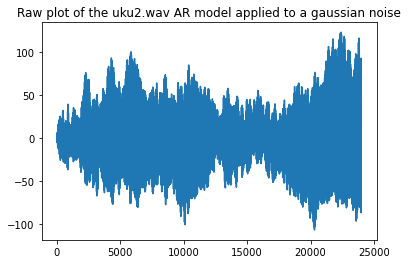

In [91]:
w_g = np.random.randn(3 * f_s)
x_ar_gaussian = sp.signal.lfilter([1], a_uku, w_g)

sp.io.wavfile.write("Data/uku2_ar_gaussian.wav", f_s, x_ar_gaussian / 150)

pl.figure()
pl.plot(x_ar_gaussian)
pl.title("Raw plot of the uku2.wav AR model applied to a gaussian noise")

This is pretty similar to what we got for uku.wav, but with a lower frequency.

Text(0.5, 1.0, 'Raw plot of the uku2.wav AR model applied to the dirac comb')

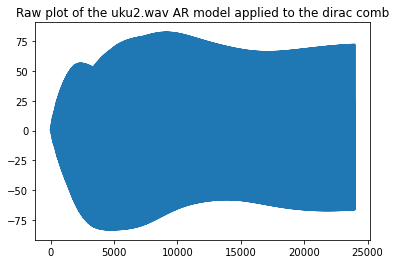

In [92]:
def comb(k):
    if k % int(f_s / f_0) == 0:
        return 1
    return 0

w_comb = [comb(k) for k in range(3 * f_s)]
x_ar_comb = sp.signal.lfilter([1], a_uku, w_comb)

sp.io.wavfile.write("Data/uku2_ar_comb.wav", f_s, x_ar_comb / 100)

pl.figure()
pl.plot(x_ar_comb)
pl.title("Raw plot of the uku2.wav AR model applied to the dirac comb")

This time also, it is very smooth and close to the ukulele sound.

## 3 Wiener filtering

### 3.1 Simulated signals

#### Question 1

In [93]:
f_0 = 0.1
N_s = 1024
sigma = np.sqrt(1.2)

phi = np.random.uniform(0, 2 * np.pi)
w = sigma * np.random.randn(N_s)

n = np.arange(N_s)
y = np.cos(2 * np.pi * f_0 * n + phi)
x = y + w

#### Question 2

In this case, we can compute the theoretical autocorrelation and cross-correlation (see corresponding lecture), which allows us to express the Wiener-Hopf linear system $R_xh = r_{xy}$, which we can then solve using the Levinson-Durbin recursion (sp.linalg.solve_toeplitz).

In [94]:
N = 10

auto_corr_th = 0.5 * np.cos(2 * np.pi  * f_0 * n)
auto_corr_th[0] += sigma ** 2
cross_cor_th = 0.5 * np.cos(2 * np.pi  * f_0 * n)

c = auto_corr_th[: N + 1]
r_xy = cross_cor_th[: N + 1]
h = sp.linalg.solve_toeplitz(c, r_xy)

#### Question 3

1034


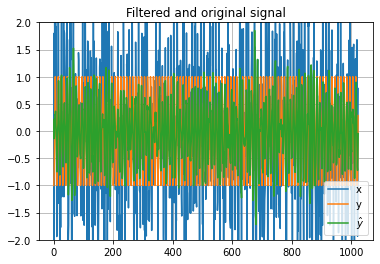

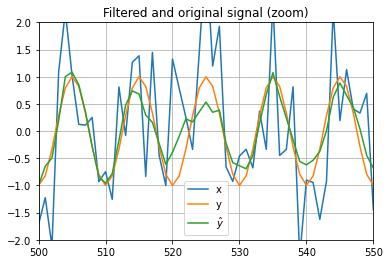

In [95]:
y_est = sp.signal.convolve(x, h)
y_filt = sp.signal.convolve(y, h)
w_filt = sp.signal.convolve(w, h)
print(len(y_est))

pl.figure()
pl.plot(x, label = "x")
pl.plot(y, label = "y")
pl.plot(y_est[: len(x)], label = "$\hat y$")
pl.ylim(-2, 2)
pl.title("Filtered and original signal")
pl.grid()
pl.legend()

pl.figure()
pl.plot(x, label = "x")
pl.plot(y, label = "y")
pl.plot(y_est[: len(x)], label = "$\hat y$")
pl.xlim(500, 550)
pl.ylim(-2, 2)
pl.title("Filtered and original signal (zoom)")
pl.grid()
pl.legend()

I used a convolution with zero padding, which is why the estimated signal is close to zero near the borders.
<br>But when we look at other parts of the plot, we can see (after a zoom because there a lot of periods in that graph) that the estimation globally follows the noiseless signal even though it is not very precise. It could be smoother but this is much better than the original signal which is very noisy.

#### Question 4

SNR of the noisy signal : 1.4166666666666667


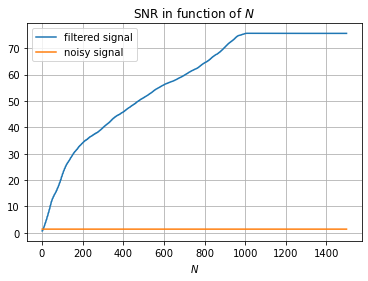

In [96]:
Ns = np.arange(1, 1500)
snr_noisy = (0.5 + sigma ** 2) / (sigma ** 2)

def snr(N):
    c = auto_corr_th[: N + 1]
    r_xy = cross_cor_th[: N + 1]
    h_N = sp.linalg.solve_toeplitz(c, r_xy)
    y_filt_N = sp.signal.convolve(y, h_N)[: N_s]
    w_filt_N = sp.signal.convolve(w, h_N)[: N_s]
    return (y_filt_N.std() / w_filt_N.std()) ** 2

snrs = [snr(N) for N in Ns]

pl.figure()
pl.plot(Ns, snrs, label = "filtered signal")
pl.plot(Ns, snr_noisy * np.ones(len(Ns)), label = "noisy signal")
pl.xlabel("$N$")
pl.title("SNR in function of $N$")
pl.grid()
pl.legend()

print("SNR of the noisy signal :", snr_noisy)

The SNR starts by growing linearly with N. Then, we can see that the optimal value of the SNR is obtained for N bigger than 1000 where there is a plateau of value around 75, which is quite big.

### 3.2 Filtering noise in real life signal

#### Question 1

(-1000.0, 1000.0)

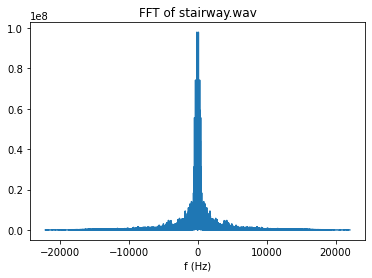

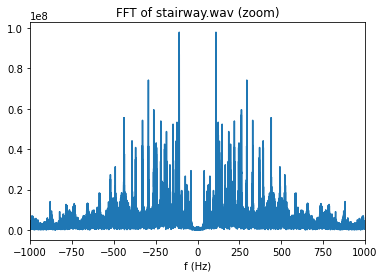

In [125]:
f_s, y = sp.io.wavfile.read("Data/stairway.wav")

y_fft = np.fft.fft(y)
y_fft = np.fft.fftshift(y_fft)
freqs = np.fft.fftfreq(len(y), 1 / f_s)
freqs = np.fft.fftshift(freqs)

pl.figure()
pl.plot(freqs, abs(y_fft))
pl.title("FFT of stairway.wav")
pl.xlabel('f (Hz)')

pl.figure()
pl.plot(freqs, abs(y_fft))
pl.title("FFT of stairway.wav (zoom)")
pl.xlabel('f (Hz)')
pl.xlim(-1000, 1000)

#### Question 2

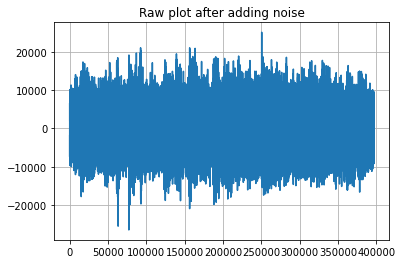

In [126]:
sigma = np.std(y)
w = sigma * np.random.randn(len(y))
x = y + w
pl.plot(x)
pl.grid()
pl.title("Raw plot after adding noise")
sp.io.wavfile.write("Data/stairwayb2.wav", f_s, x / 25000) # Divide by the approximate amplitude to avoid clipping

We can hear a clear noise when listening to the new noisy signal.

#### Question 3

In [127]:
N = 100

R_x = sp.signal.correlate(x / 25000, x / 25000)[len(x) - 1 :]
R_y = sp.signal.correlate(y / 25000, y / 25000)[len(y) - 1 :]

c = R_x[: N + 1]
r_xy = R_y[: N + 1]
h = sp.linalg.solve_toeplitz(c, r_xy)

This time, we do not know the theoretical correlations. Thus, we have to use empirical correlations to express the Wiener-Hopf equations.
<br> Also, to avoid numerical errors, I normalized the signals before computing the empirical autocorrelations. It doesn't change the final output because the normalization factor will be on each side of the Wiener-Hopf equations.

#### Question 4

SNR of the noisy signal : 1.0007992060716044
SNR of the filtered signal : 6.755738594539091


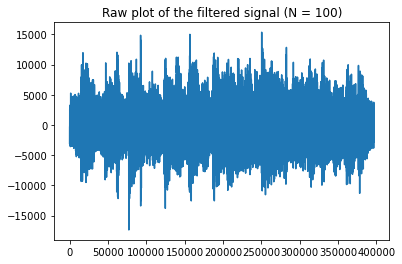

In [128]:
x_filtered = sp.signal.convolve(x, h)[: len(y)]
pl.plot(x_filtered)
pl.title("Raw plot of the filtered signal (N = 100)")

sp.io.wavfile.write("Data/stairwayb2_filtered.wav", f_s, x_filtered / 20000)

snr_noisy = (y.std() / w.std()) ** 2
y_filt = sp.signal.convolve(y, h)[: len(y)]
w_filt = sp.signal.convolve(w, h)[: len(w)]
snr_filtered = (y_filt.std() / w_filt.std()) ** 2
print("SNR of the noisy signal :", snr_noisy)
print("SNR of the filtered signal :", snr_filtered)

When listening to the filtered sound, the noise is attenuated but it is still a big part of the signal. Let's see if we can have a bigger SNR by varying the order of the filter.

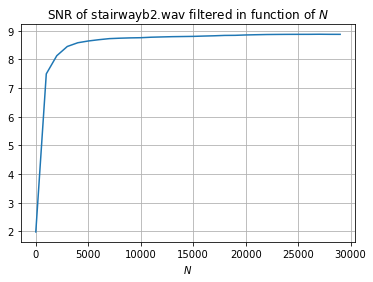

In [129]:
Ns = np.arange(1, 30000, 1000)

def snr(N):
    c = R_x[: N + 1]
    r_xy = R_y[: N + 1]
    h = sp.linalg.solve_toeplitz(c, r_xy)
    y_filt = sp.signal.convolve(y, h)[: len(y)]
    w_filt = sp.signal.convolve(w, h)[: len(w)]
    return (y_filt.std() / w_filt.std()) ** 2

snrs = [snr(N) for N in Ns]

pl.figure()
pl.plot(Ns, snrs)
pl.xlabel("$N$")
pl.title("SNR of stairwayb2.wav filtered in function of $N$")
pl.grid()

The SNR grows with N. It starts pretty quickly and later it starts to plateau after N = 25000 at a value of only 9.
<br>Here, we have a sampling frequency $f_s = 44100$ Hz. Thus, it corresponds to a delay of 25000/44100 = 0.6 s if we are filtering in real time, which is pretty big.

#### Question 5

(-1000.0, 1000.0)

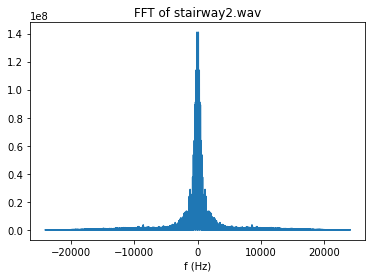

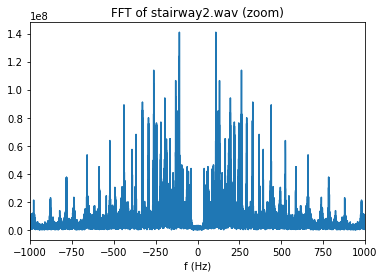

In [130]:
f_s2, y2 = sp.io.wavfile.read("Data/stairway2.wav")

y2_fft = np.fft.fft(y2)
y2_fft = np.fft.fftshift(y2_fft)
freqs = np.fft.fftfreq(len(y2), 1 / f_s2)
freqs = np.fft.fftshift(freqs)

pl.figure()
pl.plot(freqs, abs(y2_fft))
pl.title("FFT of stairway2.wav")
pl.xlabel('f (Hz)')

pl.figure()
pl.plot(freqs, abs(y2_fft))
pl.title("FFT of stairway2.wav (zoom)")
pl.xlabel('f (Hz)')
pl.xlim(-1000, 1000)

In [131]:
N = 100

R_x = sp.signal.correlate(x / 25000, x / 25000)[len(x) - 1 :]
R_y = sp.signal.correlate(y2 / 25000, y2 / 25000)[len(y2) - 1 :]

c = R_x[: N + 1]
r_xy = R_y[: N + 1]
h2 = sp.linalg.solve_toeplitz(c, r_xy)

SNR of the noisy signal : 1.0007992060716044
SNR of the filtered signal : 7.102949856895349


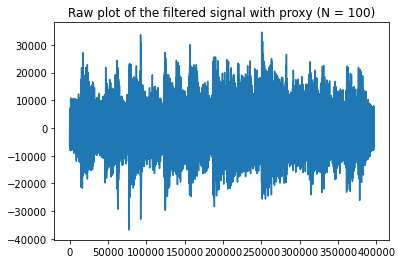

In [132]:
x_filtered_proxy = sp.signal.convolve(x, h2)[: len(x)]
pl.plot(x_filtered_proxy)
pl.title("Raw plot of the filtered signal with proxy (N = 100)")

sp.io.wavfile.write("Data/stairwayb2_filtered_proxy.wav", f_s, x_filtered_proxy / 4000)

snr_noisy = (y.std() / w.std()) ** 2
y_filt2 = sp.signal.convolve(y, h2)[: len(y)]
w_filt2 = sp.signal.convolve(w, h2)[: len(w)]
snr_filtered = (y_filt2.std() / w_filt2.std()) ** 2
print("SNR of the noisy signal :", snr_noisy)
print("SNR of the filtered signal :", snr_filtered)

When the proxy signal is used instead of y, the audio quality is worse as we can hear when listening to the filtered signal. Moreover, the noise seems less constant this time and we can hear oscillations.

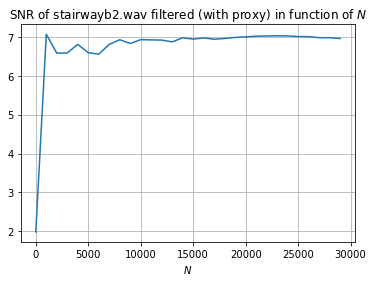

In [133]:
Ns = np.arange(1, 30000, 1000)

def snr2(N):
    c = R_x[: N + 1]
    r_xy = R_y[: N + 1]
    h2 = sp.linalg.solve_toeplitz(c, r_xy)
    y_filt = sp.signal.convolve(y, h2)[: len(y)]
    w_filt = sp.signal.convolve(w, h2)[: len(w)]
    return (y_filt.std() / w_filt.std()) ** 2

snrs = [snr2(N) for N in Ns]

pl.figure()
pl.plot(Ns, snrs)
pl.xlabel("$N$")
pl.title("SNR of stairwayb2.wav filtered (with proxy) in function of $N$")
pl.grid()

This time, we also have a plateau for N > 25000 at which the SNR is 7, which is less than what we obtained with the real signal (SNR = 9).

#### Question 6

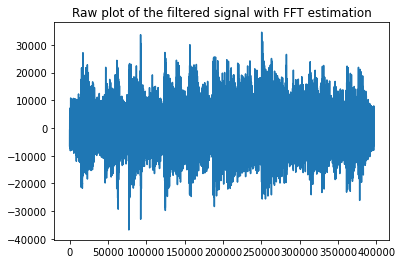

In [156]:
psd_y = abs(np.fft.fft(y)) ** 2

h = np.fft.ifft(psd_y / (psd_y + len(y) * sigma ** 2)).real #We need to have the same factor N before every PSD

x_filt = sp.signal.convolve(x, h)[: len(x)]
pl.plot(x_filtered_proxy)
pl.title("Raw plot of the filtered signal with FFT estimation")

sp.io.wavfile.write("Data/stairwayb2_filtered_ifft.wav", f_s, x_filt / 4000)

The filtered signal is similar than with the linear system estimation, but the noise has some oscillations, which are caused by some border effects of the cirular convolution.

In [157]:
snr_noisy = (y.std() / w.std()) ** 2
y_filt = sp.signal.convolve(y, h)[: len(y)]
w_filt = sp.signal.convolve(w, h)[: len(w)]
snr_filtered = (y_filt.std() / w_filt.std()) ** 2
print("SNR of the noisy signal :", snr_noisy)
print("SNR of the filtered signal :", snr_filtered)

SNR of the noisy signal : 1.0007992060716044
SNR of the filtered signal : 9.088061215834415


The SNR has the same value as the maximal SNR of the first Wiener filtering we did (in the temporal domain).

#### Question 7

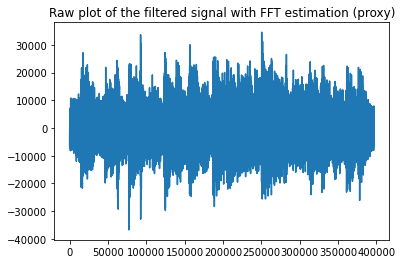

In [158]:
psd_y2 = abs(np.fft.fft(y2)) ** 2

h2 = np.fft.ifft(psd_y2 / (psd_y2 + len(y2) * sigma ** 2)).real #We need to have the same factor N before every PSD

x_filt2 = sp.signal.convolve(x, h2)[: len(x)]
pl.plot(x_filtered_proxy)
pl.title("Raw plot of the filtered signal with FFT estimation (proxy)")

sp.io.wavfile.write("Data/stairwayb2_filtered_ifft_proxy.wav", f_s, x_filt2 / 4000)

The noise has more oscillations when the proxy signal is used.

In [159]:
snr_noisy = (y.std() / w.std()) ** 2
y_filt2 = sp.signal.convolve(y, h2)[: len(y)]
w_filt2 = sp.signal.convolve(w, h2)[: len(w)]
snr_filtered = (y_filt2.std() / w_filt2.std()) ** 2
print("SNR of the noisy signal :", snr_noisy)
print("SNR of the filtered signal :", snr_filtered)

SNR of the noisy signal : 1.0007992060716044
SNR of the filtered signal : 6.589450136508355


We recover the maximum SNR of the Wiener filter which was estimated in the temporal domain.
<br>Finally, when estimating the Wiener filter in real time, we need a causal filter and a delay to have a good SNR whereas when we do it offline we can have an equally good SNR by using the Fourier domain. In both cases, the SNR is a bit lower when using a proxy signal and it adds some oscillations in the noise.

### Personal discussion

I found this practical session more challenging than the first one. Indeed, a good understanding of the theory was needed before being able to do anything and to understand the results. Moreover, I was not really used to approximation errors, and it was really confusing when I encountered very strange results in part 2 (with the uku signals) and it took me a long time to understand that I just had to normalize the signal.
<br>Furthermore, I think that you could have spent more time on how to compute the SNR during the lectures because I was unsure about how to do it when I reached part 3 and I didn't find any example in the lectures. I finally ended up trying something which made sense and I only found out that I was right when I looked at the correction of the last exercise sheet.
<br>However, thanks to this practical session, I have a much deeper understanding of the concepts of the course, and I am now aware of some practical details (like approximation errors with least squares), which is nice !